In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv(filepath_or_buffer='../DATA/sonar.all-data.csv')
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


<Axes: >

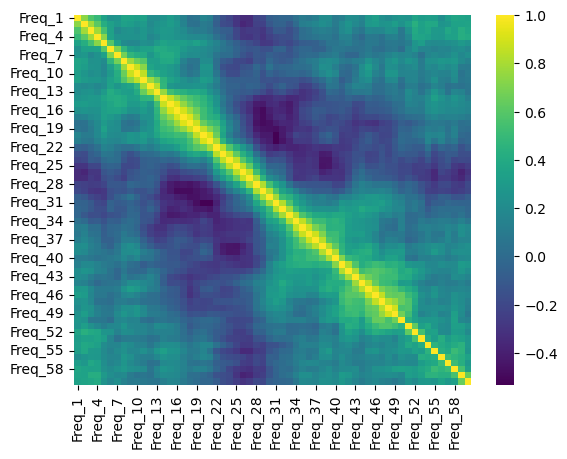

In [3]:
sns.heatmap(df.select_dtypes(exclude='object').corr(), cmap='viridis')

In [4]:
df['Label'] = df['Label'].map(arg={'R':0, 'M':1})

In [5]:
df.corr()['Label'].sort_values(ascending=False)

Label      1.000000
Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
             ...   
Freq_31   -0.110728
Freq_34   -0.172010
Freq_37   -0.209055
Freq_35   -0.227670
Freq_36   -0.269151
Name: Label, Length: 61, dtype: float64

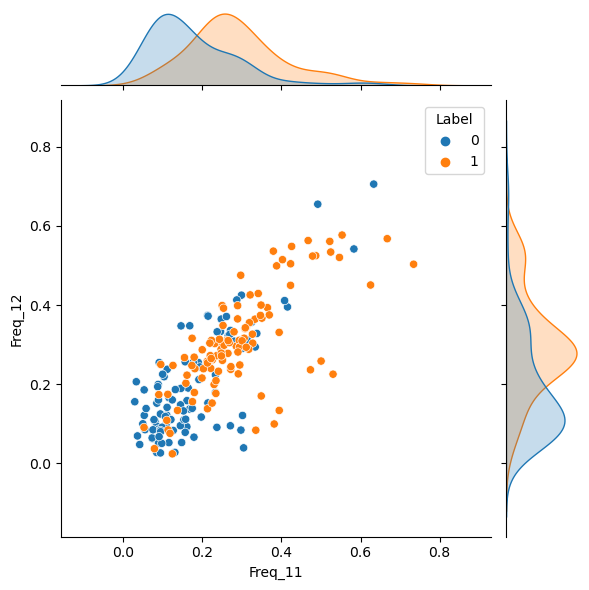

In [6]:
sns.jointplot(data=df, x='Freq_11', y='Freq_12' , hue='Label')

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

#Train | Validation | holdout split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Label'), df['Label'], test_size=0.10, random_state=42)

In [8]:
# Pipeline with instatited base moduls 
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_jobs=-1))
pipe_log = make_pipeline(StandardScaler(), LogisticRegression(n_jobs=-1, solver='saga',penalty='elasticnet', max_iter=10 ** 5))

In [9]:
#hyperparameter space 
search_knn = {'kneighborsclassifier__n_neighbors': np.arange(1,30)}
search_log = {'logisticregression__C':np.logspace(-4,1,21), 'logisticregression__l1_ratio': np.linspace(0,1,11)}


In [10]:
#Grid Searcers 
grid_knn= GridSearchCV(estimator=pipe_knn, param_grid=search_knn, n_jobs=-1, scoring=[ 'accuracy','f1'], refit='accuracy', cv=10, verbose=1)
grid_log = GridSearchCV(estimator=pipe_log, n_jobs=-1, param_grid=search_log,scoring=[ 'accuracy','f1'], refit='accuracy', cv=10, verbose=1)

In [11]:
grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 29 candidates, totalling 290 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             refit='accuracy', scoring=['accuracy', 'f1'], verbose=1)

In [12]:
grid_log.fit(X_train, y_train)

Fitting 10 folds for each of 231 candidates, totalling 2310 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=100000,
                                                           n_jobs=-1,
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.00000000e-04, 1.77827941e-04, 3.16227766e-04, 5.62341325e-04,
       1.00000000e-03, 1.77827941e-03, 3.16227766e-03, 5.62341325e-03,
       1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01]),
                         'logisticregression__l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             refit='accuracy', scoring=['accuracy', 'f1'], verbose=1)

In [13]:
knn_fit_data = pd.DataFrame(data=grid_knn.cv_results_)
knn_fit_data.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_kneighborsclassifier__n_neighbors', 'params',
       'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy',
       'split3_test_accuracy', 'split4_test_accuracy', 'split5_test_accuracy',
       'split6_test_accuracy', 'split7_test_accuracy', 'split8_test_accuracy',
       'split9_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy',
       'rank_test_accuracy', 'split0_test_f1', 'split1_test_f1',
       'split2_test_f1', 'split3_test_f1', 'split4_test_f1', 'split5_test_f1',
       'split6_test_f1', 'split7_test_f1', 'split8_test_f1', 'split9_test_f1',
       'mean_test_f1', 'std_test_f1', 'rank_test_f1'],
      dtype='object')

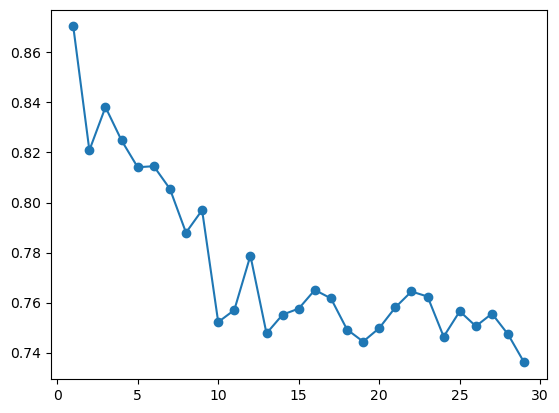

In [14]:
plt.plot(knn_fit_data['param_kneighborsclassifier__n_neighbors'], knn_fit_data['mean_test_f1'], marker='o')


In [18]:
from sklearn.metrics import classification_report ,confusion_matrix , ConfusionMatrixDisplay

y_knn_hat  = grid_knn.predict(X_test)
y_log_hat  = grid_log.predict(X_test)


In [19]:
print(classification_report(y_test, y_knn_hat))


              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



In [20]:
print(classification_report(y_test, y_log_hat))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



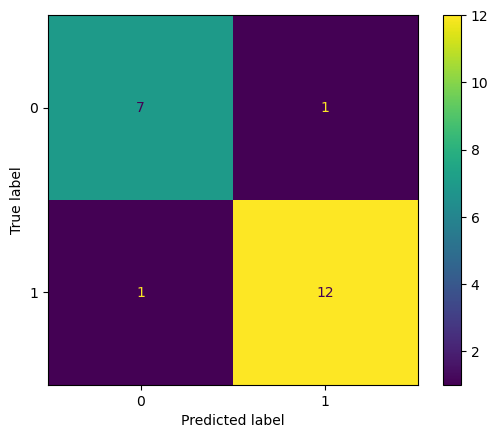

In [23]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_knn_hat), display_labels=grid_knn.classes_).plot()

In [25]:
grid_log.best_estimator_.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression',
   LogisticRegression(C=0.05623413251903491, l1_ratio=0.0, max_iter=100000,
                      n_jobs=-1, penalty='elasticnet', solver='saga'))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(C=0.05623413251903491, l1_ratio=0.0, max_iter=100000,
                    n_jobs=-1, penalty='elasticnet', solver='saga'),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 0.05623413251903491,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': 0.0,
 'logisticregression__max_iter': 100000,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': -1,
 'logisticregression__penalty': 'elasticnet',
 'logisticregressi